# Введение 
▎О наборе данных

Обзор:
Этот набор данных включает информацию для оценки уровней ожирения у людей из стран Мексики, Перу и Колумбии, основанную на их пищевых привычках и физическом состоянии. Данные содержат 17 атрибутов и 2111 записей, которые помечены классом NObesity (Уровень ожирения), что позволяет классифицировать данные по значениям: Нехватка веса, Нормальный вес, Избыточный вес I уровня, Избыточный вес II уровня, Ожирение I типа, Ожирение II типа и Ожирение III типа.

Детали данных:

• Пол: Пол

• Возраст: Возраст

• Рост: в метрах

• Вес: в килограммах

• Семейная история: Есть ли у кого-то из членов семьи проблемы с избыточным весом?

• FAVC: Часто ли вы едите высококалорийную пищу?

• FCVC: Обычно ли вы едите овощи в своих приемах пищи?

• NCP: Сколько основных приемов пищи у вас в день?

• CAEC: Едите ли вы что-либо между приемами пищи?

• Курение: Курите ли вы?

• CH2O: Сколько воды вы пьете ежедневно?

• SCC: Следите ли вы за калориями, которые едите ежедневно?

• FAF: Как часто вы занимаетесь физической активностью?

• TUE: Сколько времени вы проводите с технологическими устройствами, такими как мобильный телефон, видеоигры, телевизор, компьютер и другие?

• CALC: Как часто вы употребляете алкоголь?

• MTRANS: Какой транспорт вы обычно используете?

• Уровень ожирения (Целевая колонка): Уровень ожирения

# Первичная обрабокта данных

In [30]:
import pandas as pd 
import numpy as np


import seaborn as sns
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings('ignore')

df = pd.read_csv('Obesity prediction.csv')
df.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


добавляем индекс массы тела 

In [31]:

df['IMT'] = df['Weight'] / (df['Height'] /100 ) ** 2  #weight / (height / 100) ** 2]
#df = df.drop(['Height','Weight'], axis = 1 )
df.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity,IMT
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,243865.264441
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,242382.271468
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,237654.320988
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,268518.518519
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,283423.810125


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 
 17  IMT             2111 non-null   f

In [33]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,IMT
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866,297001.587784
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927,80113.366125
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000,129986.848897
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000,243258.018423
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350,287190.890600
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000,360165.008281
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000,508117.528057


In [34]:
numeciral = df.describe().columns.tolist()
print(numeciral)

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'IMT']


проверка на пропуски и нулевые знаения

In [35]:
print(f'Кол-во пропусков \n{df.isna().sum()}')
print(f'Кол-во нулевых значений \n{df.isnull().sum()}')

Кол-во пропусков 
Gender            0
Age               0
Height            0
Weight            0
family_history    0
FAVC              0
FCVC              0
NCP               0
CAEC              0
SMOKE             0
CH2O              0
SCC               0
FAF               0
TUE               0
CALC              0
MTRANS            0
Obesity           0
IMT               0
dtype: int64
Кол-во нулевых значений 
Gender            0
Age               0
Height            0
Weight            0
family_history    0
FAVC              0
FCVC              0
NCP               0
CAEC              0
SMOKE             0
CH2O              0
SCC               0
FAF               0
TUE               0
CALC              0
MTRANS            0
Obesity           0
IMT               0
dtype: int64


# Обработка числовых признаков

## Визуализация выбросов

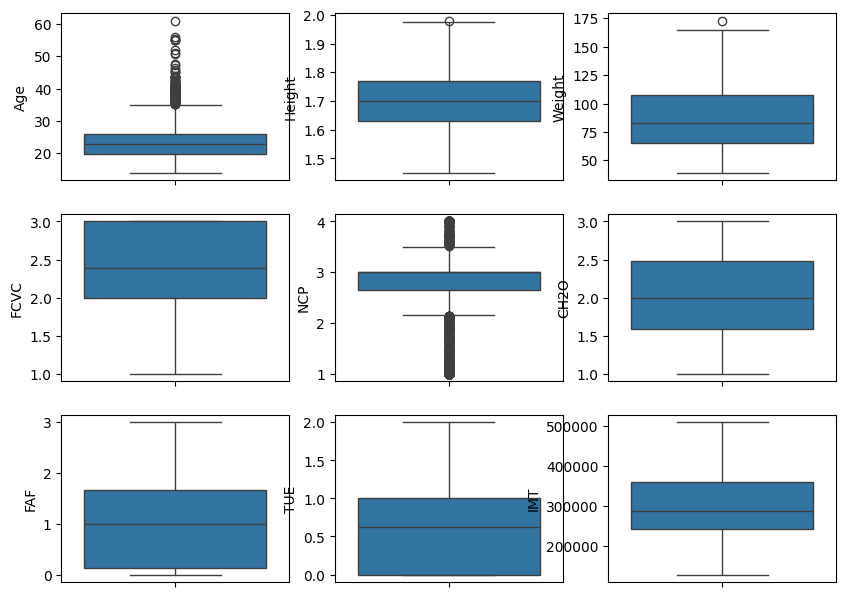

In [36]:
plt.figure(figsize=(10,10))

for _ in numeciral:
    plt.subplot(4,3,numeciral.index(_)+1)
    sns.boxplot(df[_])
plt.show()

мы видем что выбросы имею age и ncp но это вполне нормально люми могут жить до 60 лет и иметь как 4 там и 1 прием пищи в день , это вполне нормаль , остальные признаки не имею выбросов

## Корреляция признаков

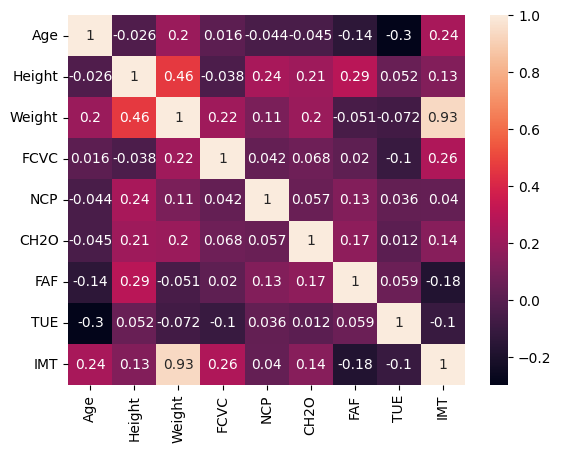

In [37]:
sns.heatmap(df[numeciral].corr(),
            annot= True,
            fmt= '0.2g')
plt.show()

как мы видим признаки подвержены не высоко коррелции что есть хорошо , из всех признаков выделяеться только вес. Корреляция составляет 93 % , чтож прийдется от него избавляться

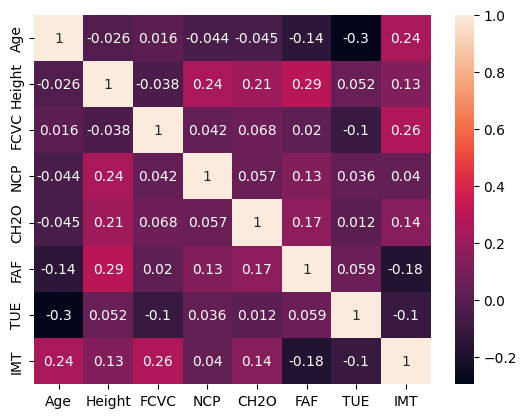

In [38]:
numeciral.remove('Weight')
sns.heatmap(df[numeciral].corr(),
            annot= True,
            fmt= '.2g')
plt.show()

теперь кореляционная гама нас устраиваем , посмотрим на распределние признаков

## Обработка категориальных признаков

In [39]:
categorial = df.select_dtypes(include='object').columns.tolist()
categorial.remove('Obesity')
target = df['Obesity']
print(categorial)

['Gender', 'family_history', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']


In [40]:
df[categorial].describe()

,Gender,family_history,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS
count,2111,2111,2111,2111,2111,2111,2111,2111
unique,2,2,2,4,2,2,4,5
top,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation
freq,1068,1726,1866,1765,2067,2015,1401,1580


## Обработка таргета

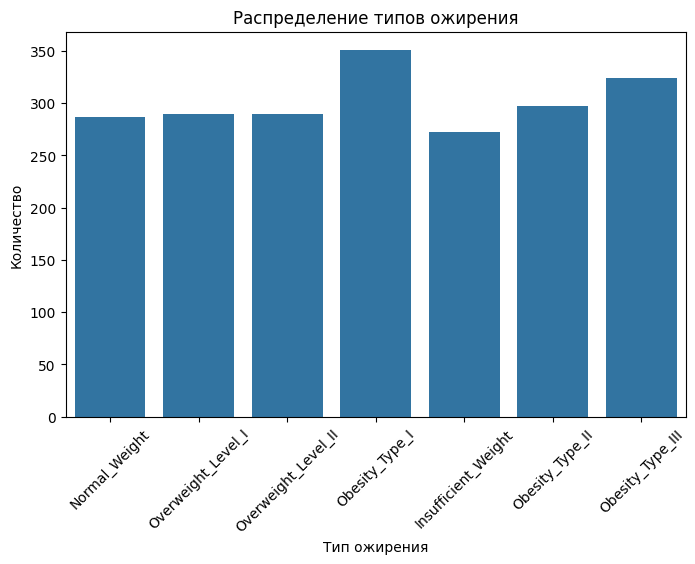

In [41]:

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Obesity')
plt.title('Распределение типов ожирения')
plt.xlabel('Тип ожирения')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.show()


# Подготовка к обучению
предобработка :

    - кодирование категориальных признаков

    - скалирование числовых признаков

In [42]:
df.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity,IMT
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,243865.264441
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,242382.271468
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,237654.320988
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,268518.518519
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,283423.810125


создаем класс модели с предобработка для дальнейшег оимпортирвоания его в приложение

In [43]:
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, TargetEncoder

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

class MultiClassTargetEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, target_col='Obesity'):
        self.target_col = target_col
        self.encodings = {}

    def fit(self, X, y):
 
        df = pd.DataFrame({X.columns[0]: X.iloc[:, 0], self.target_col: y})
        target_dummies = pd.get_dummies(df[self.target_col], prefix=X.columns[0])
        for col in target_dummies.columns:
            self.encodings[col] = df.groupby(X.columns[0])[col].mean()
        return self

    def transform(self, X):
        X_encoded = pd.DataFrame(index=X.index)
        for col in self.encodings:
            X_encoded[col] = X.iloc[:, 0].map(self.encodings[col]).fillna(0)
        return X_encoded

def create_preprocessor(categorical_cols, target_col='Obesity'):

    low_cardinality = [col for col in categorical_cols if df[col].nunique() < 10]
    high_cardinality = [col for col in categorical_cols if df[col].nunique() >= 10]

    transformers = []

    if low_cardinality:
        transformers.append(
            ('onehot', OneHotEncoder(drop='first'), low_cardinality)  
        )


    for col in high_cardinality:
        transformers.append(
            (f'target_{col}', TargetEncoder(target_type='continuous'), [col])
        )


    preprocessor = ColumnTransformer(
        transformers=transformers,
        remainder='passthrough'
    )

    return preprocessor


разделяем данные на обучающую и тестовую

In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('Obesity', axis = 1),
    df['Obesity'],
    random_state= 42,
    test_size= 0.2
)


# Обучение модели

## Модель SVM

In [45]:
from sklearn.metrics import f1_score
SVM = Pipeline([
    ('preprocessor', create_preprocessor(categorial)),
    ('model', SVC())
])

SVM.fit(X_train,y_train)
SVM_pred = SVM.predict(X_test)
print(f'F1_score для micro: {f1_score(y_true=y_test, y_pred=SVM_pred, average="micro"):.4f}')
print(f'F1_score для macro: {f1_score(y_true=y_test, y_pred=SVM_pred, average="macro"):.4f}')
print(f'F1_score для weighted: {f1_score(y_true=y_test, y_pred=SVM_pred, average="weighted"):.4f}')

F1_score для micro: 0.8983
F1_score для macro: 0.8932
F1_score для weighted: 0.8952


## Модель RandomForest

In [46]:
from sklearn.ensemble import RandomForestClassifier

RFC = Pipeline(
    [
    ('preprocessor', create_preprocessor(categorial)),
    ('Classifier', RandomForestClassifier(random_state=42))
    ]
)
RFC.fit(X_train,y_train)
RFC_pred = RFC.predict(X_test)
print(f'F1_score для micro: {f1_score(y_true=y_test, y_pred=RFC_pred, average="micro"):.4f}')
print(f'F1_score для macro: {f1_score(y_true=y_test, y_pred=RFC_pred, average="macro"):.4f}')
print(f'F1_score для weighted: {f1_score(y_true=y_test, y_pred=RFC_pred, average="weighted"):.4f}')

F1_score для micro: 0.9835
F1_score для macro: 0.9832
F1_score для weighted: 0.9834


In [47]:
RFC.named_steps.Classifier.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [48]:
from sklearn.model_selection import GridSearchCV

param_grid = {


    'Classifier__n_estimators': [100, 200, 300],

    'Classifier__max_depth': [None, 10, 20],

    'Classifier__min_samples_split': [2, 5],

    'Classifier__min_samples_leaf': [1, 2],

    'Classifier__max_features': ['sqrt', 'log2'],

    'Classifier__bootstrap': [True],

    'Classifier__class_weight': ['balanced']
    
}



# Поиск по сетке
grid_search = GridSearchCV(
    estimator=RFC,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Запуск поиска
try:
    grid_search.fit(X_train, y_train)
    print(f"Best parameter (CV score={grid_search.best_score_:.5f}):")
    print("Лучшие параметры:", grid_search.best_params_)
except Exception as e:
    print(f"Ошибка при обучении модели: {e}")

Best parameter (CV score=nan):
Лучшие параметры: {'Classifier__bootstrap': True, 'Classifier__class_weight': 'balanced', 'Classifier__max_depth': None, 'Classifier__max_features': 'sqrt', 'Classifier__min_samples_leaf': 1, 'Classifier__min_samples_split': 2, 'Classifier__n_estimators': 100}


## Classifier for Decision Tree


In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import  Pipeline
DTC_pipe = Pipeline(
    [
        ('preprocessor', create_preprocessor(categorial)),
        
        ("DTC", DecisionTreeClassifier(
            max_depth=5,
            criterion='gini',
            min_samples_split=10
        ))
    ]
)
DTC_pipe.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gender', 'family_history',
                                                   'FAVC', 'CAEC', 'SMOKE',
                                                   'SCC', 'CALC',
                                                   'MTRANS'])])),
                ('DTC',
                 DecisionTreeClassifier(max_depth=5, min_samples_split=10))])

In [50]:
from sklearn.metrics import accuracy_score
DTC_pipe.predict(X_test)
accuracy_score(y_test,DTC_pipe.predict(X_test))

0.9574468085106383

In [51]:
import joblib as jl
jl.dump(DTC_pipe, 'DTC_model.pkl')

['DTC_model.pkl']

In [52]:
DTC_pipe.predict(X_test)
accuracy_score(y_test,DTC_pipe.predict(X_test))

0.9574468085106383

In [53]:
import joblib as jl
jl.dump(DTC_pipe, 'DTC_model.pkl')

['DTC_model.pkl']

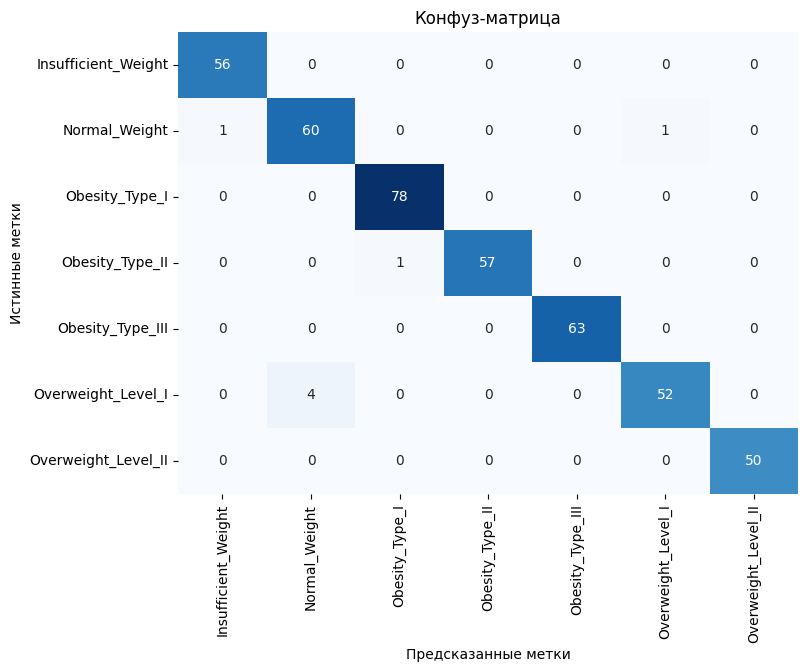

In [54]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report,roc_curve, roc_auc_score, precision_score, recall_score
# 1. Конфуз-матрица
conf_matrix = confusion_matrix(y_test, RFC_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', cbar=False,
            xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.ylabel('Истинные метки')
plt.xlabel('Предсказанные метки')
plt.title('Конфуз-матрица')
plt.show()

In [55]:
# 3. Точность (precision) и полнота (recall)
precision = precision_score(y_test, RFC_pred, average='weighted')
recall = recall_score(y_test, RFC_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')

# 4. Подробный отчет о классификации
print("Отчет о классификации:\n", classification_report(y_test, RFC_pred))


Precision: 0.9837
Recall: 0.9835
Отчет о классификации:
                      precision    recall  f1-score   support

Insufficient_Weight       0.98      1.00      0.99        56
      Normal_Weight       0.94      0.97      0.95        62
     Obesity_Type_I       0.99      1.00      0.99        78
    Obesity_Type_II       1.00      0.98      0.99        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.98      0.93      0.95        56
Overweight_Level_II       1.00      1.00      1.00        50

           accuracy                           0.98       423
          macro avg       0.98      0.98      0.98       423
       weighted avg       0.98      0.98      0.98       423



In [56]:
import joblib as jl
#jl.dumo(RFC, "RFC_model.pkl")
grid_search.score(X_test,y_test)
jl.dump(grid_search, 'grid_serch_model.pkl')

['grid_serch_model.pkl']

## Модель Knn

In [57]:
from sklearn.neighbors import KNeighborsClassifier

KNN = Pipeline(
    [
    ('preprocessor', create_preprocessor(categorial)),
    ('Classifier', KNeighborsClassifier(n_neighbors=5))
    ]
)
KNN.fit(X_train,y_train)
KNN_pred = KNN.predict(X_test)
print(f'F1_score для micro: {f1_score(y_true=y_test, y_pred=KNN_pred, average="micro"):.4f}')
print(f'F1_score для macro: {f1_score(y_true=y_test, y_pred=KNN_pred, average="macro"):.4f}')
print(f'F1_score для weighted: {f1_score(y_true=y_test, y_pred=KNN_pred, average="weighted"):.4f}')

F1_score для micro: 0.9433
F1_score для macro: 0.9434
F1_score для weighted: 0.9432


## Модель all vs all $ all vs rest

In [58]:
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.linear_model import SGDClassifier


all_vs_all = Pipeline(
    [
    ('preprocessor', create_preprocessor(categorial)),
    ('Classifier', OneVsOneClassifier(SGDClassifier(loss='log_loss')) )
    ]
)

one_vs_all = Pipeline(
    [
    ('preprocessor', create_preprocessor(categorial)),
    ('Classifier', OneVsRestClassifier(SGDClassifier(loss='log_loss')) )
    ]
)

all_vs_all.fit(X_train,y_train)
all_vs_all_pred = all_vs_all.predict(X_test)
print(f'F1_score для micro: {f1_score(y_true=y_test, y_pred=all_vs_all_pred, average="micro"):.4f}')
print(f'F1_score для macro: {f1_score(y_true=y_test, y_pred=all_vs_all_pred, average="macro"):.4f}')
print(f'F1_score для weighted: {f1_score(y_true=y_test, y_pred=all_vs_all_pred, average="weighted"):.4f}')


one_vs_all.fit(X_train,y_train)
one_vs_all_pred = one_vs_all.predict(X_test)
print(f'F1_score для micro: {f1_score(y_true=y_test, y_pred=one_vs_all_pred, average="micro"):.4f}')
print(f'F1_score для macro: {f1_score(y_true=y_test, y_pred=one_vs_all_pred, average="macro"):.4f}')
print(f'F1_score для weighted: {f1_score(y_true=y_test, y_pred=one_vs_all_pred, average="weighted"):.4f}')

F1_score для micro: 0.1182
F1_score для macro: 0.0302
F1_score для weighted: 0.0250
F1_score для micro: 0.1371
F1_score для macro: 0.0345
F1_score для weighted: 0.0331
